<a href="https://colab.research.google.com/github/ShivaniLad/My-Work/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation with Loan Train Dataset

## Mounting with Drive

In [55]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [95]:
# importing the libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [57]:
# loading the data
data = pd.read_csv("/content/drive/MyDrive/1Rivet/ML & Python/Case Studies/First/loan_train.csv")
data

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [58]:
# dropping the unused column
data = data.drop(['Unnamed: 0'], axis= 1)
data

,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...
341,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


## Data Preprocessing

In [59]:
data.isna().count()

Unnamed: 0.1      346
loan_status       346
Principal         346
terms             346
effective_date    346
due_date          346
age               346
education         346
Gender            346
dtype: int64

In [60]:
data.describe()

,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000
mean,202.167630,943.641618,22.653179,30.939306
std,115.459715,109.425530,7.991006,6.039418
min,0.000000,300.000000,7.000000,18.000000
25%,107.250000,900.000000,15.000000,27.000000
50%,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,1000.000000,30.000000,35.000000
max,399.000000,1000.000000,30.000000,51.000000


In [61]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   loan_status     346 non-null    object
 2   Principal       346 non-null    int64 
 3   terms           346 non-null    int64 
 4   effective_date  346 non-null    object
 5   due_date        346 non-null    object
 6   age             346 non-null    int64 
 7   education       346 non-null    object
 8   Gender          346 non-null    object
dtypes: int64(4), object(5)
memory usage: 24.5+ KB


In [62]:
data['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

In [63]:
le = LabelEncoder()
data['education'] = le.fit_transform(data['education'])

In [64]:
data['loan_status'].unique()


array(['PAIDOFF', 'COLLECTION'], dtype=object)

In [65]:
data['loan_status'] = le.fit_transform(data['loan_status'])
data['Gender'] = le.fit_transform(data['Gender'])

In [66]:
data

,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,1,1000,30,9/8/2016,10/7/2016,45,1,1
1,2,1,1000,30,9/8/2016,10/7/2016,33,0,0
2,3,1,1000,15,9/8/2016,9/22/2016,27,3,1
3,4,1,1000,30,9/9/2016,10/8/2016,28,3,0
4,6,1,1000,30,9/9/2016,10/8/2016,29,3,1
...,...,...,...,...,...,...,...,...,...
341,394,0,800,15,9/11/2016,9/25/2016,32,1,1
342,395,0,1000,30,9/11/2016,10/10/2016,25,1,1
343,397,0,800,15,9/12/2016,9/26/2016,39,3,1
344,398,0,1000,30,9/12/2016,11/10/2016,28,3,1


In [67]:
data['due_date'].unique()

array(['10/7/2016', '9/22/2016', '10/8/2016', '9/24/2016', '9/16/2016',
       '10/9/2016', '10/10/2016', '9/25/2016', '9/17/2016', '11/9/2016',
       '10/25/2016', '9/26/2016', '10/11/2016', '11/10/2016', '9/18/2016',
       '10/26/2016', '9/19/2016', '10/12/2016', '9/27/2016', '9/28/2016',
       '10/13/2016', '11/12/2016', '9/23/2016'], dtype=object)

In [68]:
data['effective_date'].unique()

array(['9/8/2016', '9/9/2016', '9/10/2016', '9/11/2016', '9/12/2016',
       '9/13/2016', '9/14/2016'], dtype=object)

In [69]:
data['effective_date'] = pd.to_datetime(data['effective_date'])

In [70]:
data

,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,1,1000,30,2016-09-08,10/7/2016,45,1,1
1,2,1,1000,30,2016-09-08,10/7/2016,33,0,0
2,3,1,1000,15,2016-09-08,9/22/2016,27,3,1
3,4,1,1000,30,2016-09-09,10/8/2016,28,3,0
4,6,1,1000,30,2016-09-09,10/8/2016,29,3,1
...,...,...,...,...,...,...,...,...,...
341,394,0,800,15,2016-09-11,9/25/2016,32,1,1
342,395,0,1000,30,2016-09-11,10/10/2016,25,1,1
343,397,0,800,15,2016-09-12,9/26/2016,39,3,1
344,398,0,1000,30,2016-09-12,11/10/2016,28,3,1


In [71]:
data['due_date'] = pd.to_datetime(data['due_date'])

In [72]:
data

,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,1,1000,30,2016-09-08,2016-10-07,45,1,1
1,2,1,1000,30,2016-09-08,2016-10-07,33,0,0
2,3,1,1000,15,2016-09-08,2016-09-22,27,3,1
3,4,1,1000,30,2016-09-09,2016-10-08,28,3,0
4,6,1,1000,30,2016-09-09,2016-10-08,29,3,1
...,...,...,...,...,...,...,...,...,...
341,394,0,800,15,2016-09-11,2016-09-25,32,1,1
342,395,0,1000,30,2016-09-11,2016-10-10,25,1,1
343,397,0,800,15,2016-09-12,2016-09-26,39,3,1
344,398,0,1000,30,2016-09-12,2016-11-10,28,3,1


In [73]:
# Removing unneccesary data column

data = data.drop(['effective_date'], axis= 1)
data = data.drop(['due_date'], axis= 1)
data

,Unnamed: 0.1,loan_status,Principal,terms,age,education,Gender
0,0,1,1000,30,45,1,1
1,2,1,1000,30,33,0,0
2,3,1,1000,15,27,3,1
3,4,1,1000,30,28,3,0
4,6,1,1000,30,29,3,1
...,...,...,...,...,...,...,...
341,394,0,800,15,32,1,1
342,395,0,1000,30,25,1,1
343,397,0,800,15,39,3,1
344,398,0,1000,30,28,3,1


## Co-relating the data

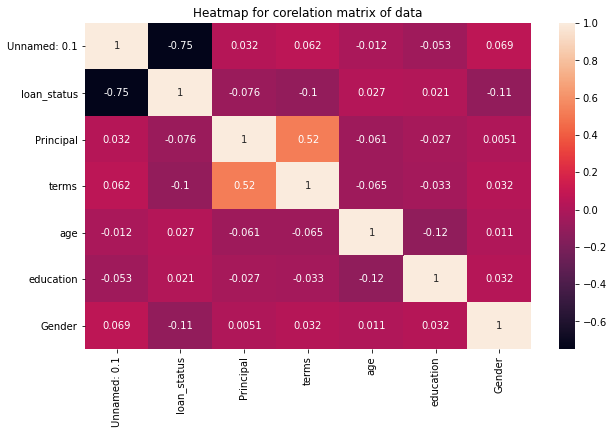

In [102]:
# corelation matrix for the data
cm = data.corr()

# Heatmap for corelation matrix
plt.figure(figsize= (10,6))
plt.title("Heatmap for corelation matrix of data")
sns.heatmap(cm, annot= True)

Highest correlation is seen between Principal and Terms

## Splitting the data

In [74]:
x = data.drop(['loan_status'], axis= 1)
y = data['loan_status']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

## Decision Tree Classifier

In [75]:
model = DecisionTreeClassifier(criterion= 'entropy')

# fitting the training data into the model
model.fit(xtrain, ytrain)

# predicting the testing data
ypred = model.predict(xtest)

# model testing accuracy
accuracy_score(ytest, ypred)

1.0

## Linear Regression

In [79]:
model = LinearRegression()

# fitting the training data into the model
model.fit(xtrain, ytrain)

# predicting the testing data
ypred = model.predict(xtest)

# model testing accuracy
r2_score(ytest, ypred)

0.3352669918221324

## Logistic Regression

In [86]:
model = LogisticRegression(max_iter= 500)

# fitting the training data into the model
model.fit(xtrain, ytrain)

# predicting the testing data
ypred = model.predict(xtest)

# model testing accuracy
print("\n Accuracy Score : \n",accuracy_score(ytest, ypred))

# confusion metrix for the model
print("\n Confusion Matrix : \n",confusion_matrix(ytest, ypred))

# classification report
print("\n Classification Report : \n",classification_report(ytest, ypred))


 Accuracy Score : 
 1.0

 Confusion Matrix : 
 [[12  0]
 [ 0 58]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        58

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

